# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
'''
I am going to perform the following actions to process the data
- drop the duplicates, drop the NAN values, remove the outliers
- perform modeling including Linear Regression
'''

In [ ]:
 '''
 Ultimately, I need to find a way to tell the car dealership which feature of the car has the greatest impact on the price.
 '''

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [76]:
import warnings
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from warnings import filterwarnings 
filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error

import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [77]:
# read CSV
df = pd.read_csv('data/vehicles.csv')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [79]:
# Find Mean
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [89]:
# drop na values
df_dropNA = df.dropna()

In [90]:
# drop duplicates
df_withoutDuplicates = df_dropNA.drop_duplicates()

In [91]:
# I am going to remove the word cylinder from the cylinders column
df_withoutDuplicates['cylinders'] = df_withoutDuplicates['cylinders'].str.replace(' cylinders', '')

# and keep only columns with numerical values
numerical_col = ['id','price','year','cylinders','odometer']

df_processed = df_withoutDuplicates[numerical_col]

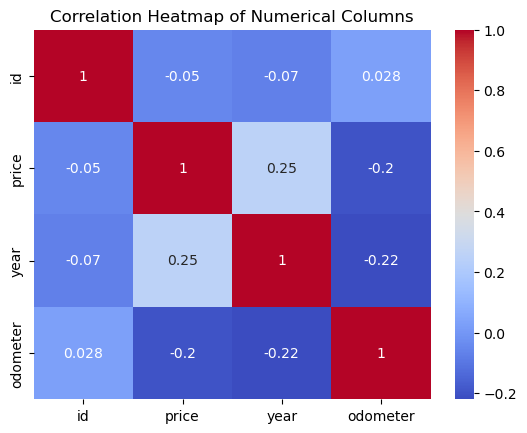

In [92]:
# Create heatmap of data
sns.heatmap(df_processed.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [84]:
# it seems the most correlated values affecting price are year and odometer. 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

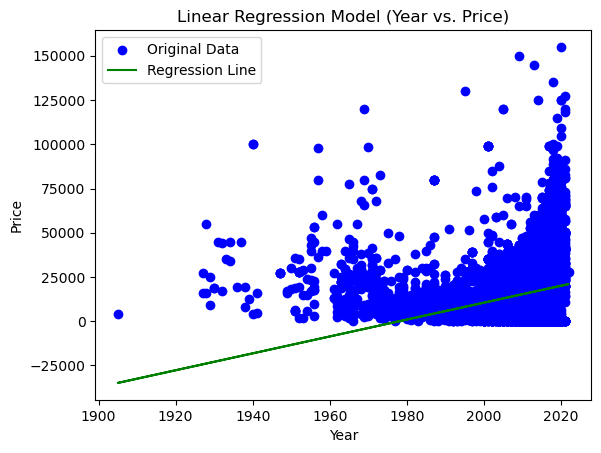

In [93]:
# I am going to create a linear regression model
# First I create X and Y variables (focusing on year)
X = df_processed[['year']]
y = df_processed['price']

# Here I create the linear regression model
model = LinearRegression()

# I now fir the model
model.fit(X, y)

# Gather coeffecients
# Coefficients (slope)
coefficients = model.coef_

# Intercept
intercept = model.intercept_

# Plot the original data points
plt.scatter(df_processed['year'], df_processed['price'], label='Original Data', color='b')

# Plot the regression line
plt.plot(df_processed['year'], model.predict(X), label='Regression Line', color='g')

plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression Model (Year vs. Price)')
plt.legend()
plt.show()

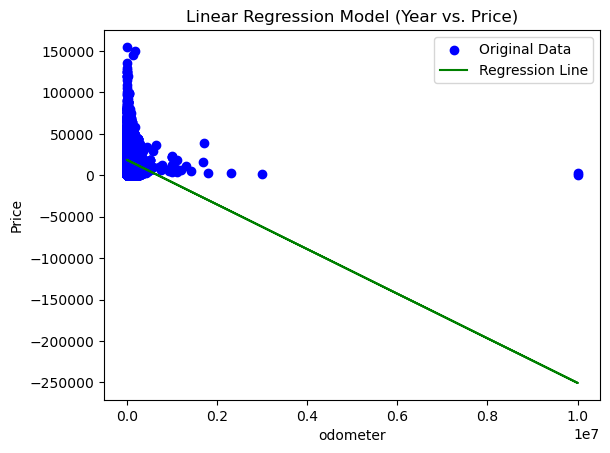

In [94]:
# I am going to create a linear regression model
# First I create X and Y variables (focusing on odometer)
X = df_processed[['odometer']]
y = df_processed['price']

# Here I create the linear regression model
model = LinearRegression()

# I now fir the model
model.fit(X, y)

# Gather coeffecients
# Coefficients (slope)
coefficients = model.coef_

# Intercept
intercept = model.intercept_

# Plot the original data points
plt.scatter(df_processed['odometer'], df_processed['price'], label='Original Data', color='b')

# Plot the regression line
plt.plot(df_processed['odometer'], model.predict(X), label='Regression Line', color='g')

plt.xlabel('odometer')
plt.ylabel('Price')
plt.title('Linear Regression Model (Year vs. Price)')
plt.legend()
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [95]:
# It seems the linear regression did not work so well. As the price changes rapidly as year and odometer values change. 
# I will now attempt Lasso analysis

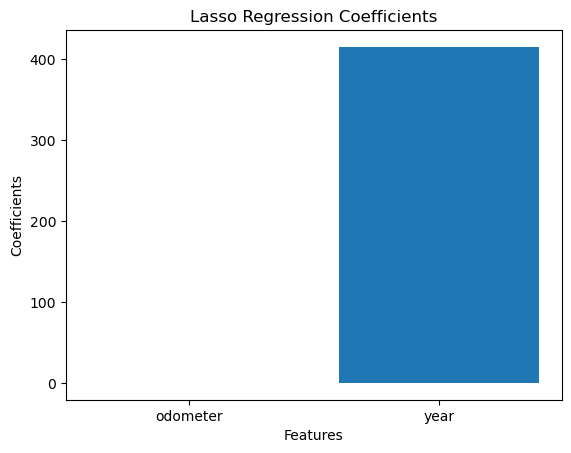

In [97]:
# Import Lasso package
from sklearn.linear_model import Lasso

# Keep only the relevant columns for Lasso regression
df_new = df_processed[['odometer', 'year', 'price']]

# Split the data into independent variables (X) and the dependent variable (y)
X = df_new[['odometer', 'year']]
y = df_new['price']

# Create the Lasso regression model
model = Lasso(alpha=1.0)  

# Fit the model with your data
model.fit(X, y)

# Get the coefficients of the Lasso model
coefficients = model.coef_
intercept = model.intercept_

# Plot the coefficients of the Lasso model
plt.bar(['odometer', 'year'], coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Coefficients')
plt.show()

In [ ]:
# It seems the year of the car has the greatest effect on the price of the car.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
# According to my analysis variables greatly affecting price are mainly
# 1. Year or age of the car
# 2. Odometer reading

In [ ]:
# However the variable with largest effect so far is year of the car.